In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the preprocessed dataset
stock_data = pd.read_csv('/content/cleaned_stock_data.csv')

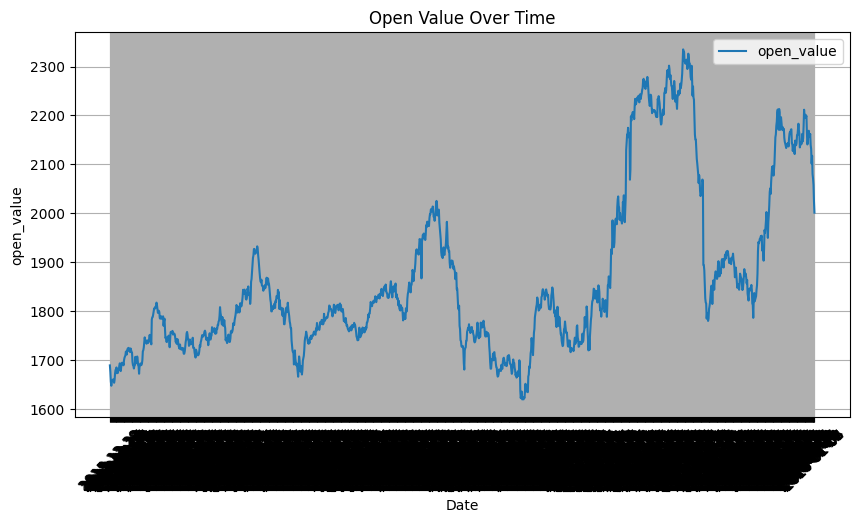

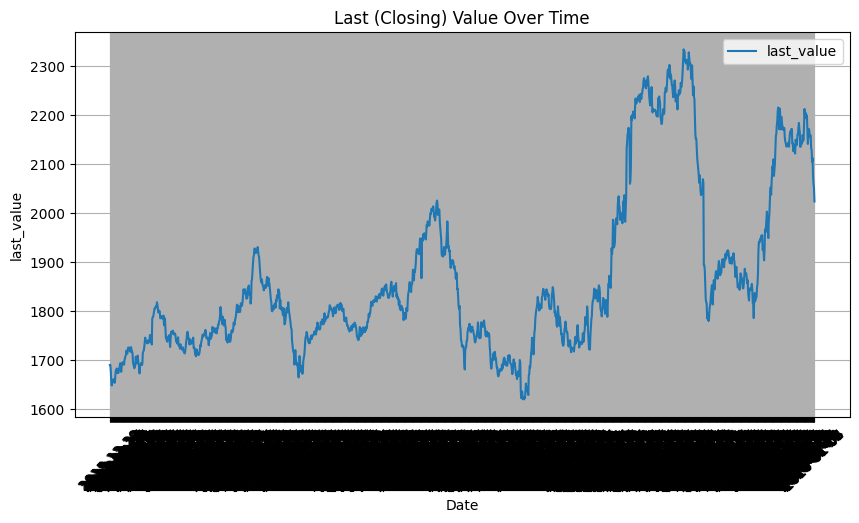

In [10]:
# Visualizing the Stock Price Trends
def plot_stock_trends(data, column, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['date'], data[column], label=column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{title} Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

plot_stock_trends(stock_data, 'open_value', 'Open Value')
plot_stock_trends(stock_data, 'last_value', 'Last (Closing) Value')

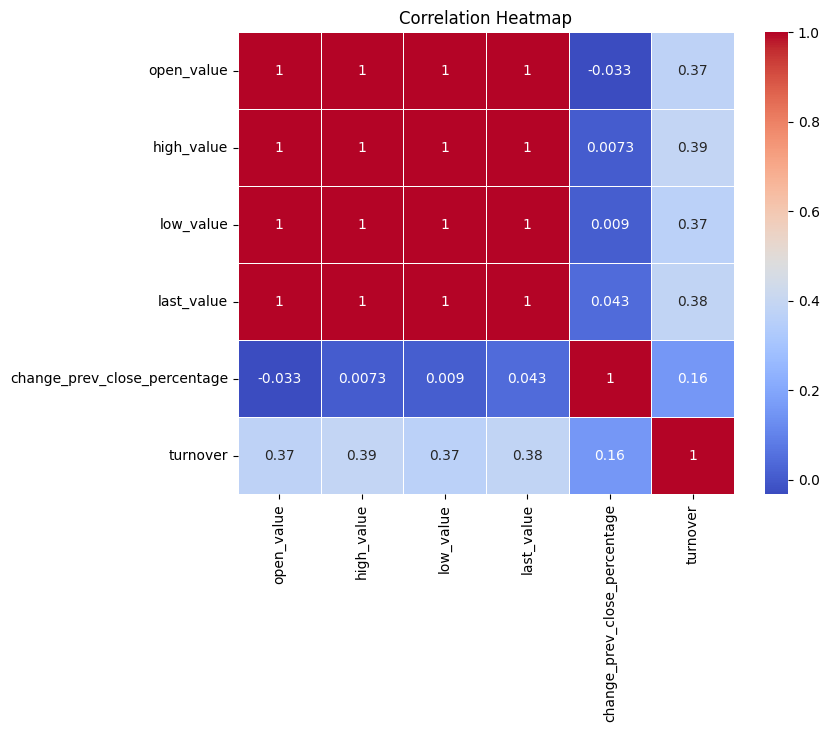

In [13]:
# Correlation Heatmap
def plot_correlation_heatmap(data):
  # Select only numeric columns for correlation calculation
  numeric_data = stock_data.select_dtypes(include=[np.number])

  plt.figure(figsize=(8, 6))
  correlation_matrix = numeric_data.corr()
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
  plt.title('Correlation Heatmap')
  plt.show()

plot_correlation_heatmap(stock_data)

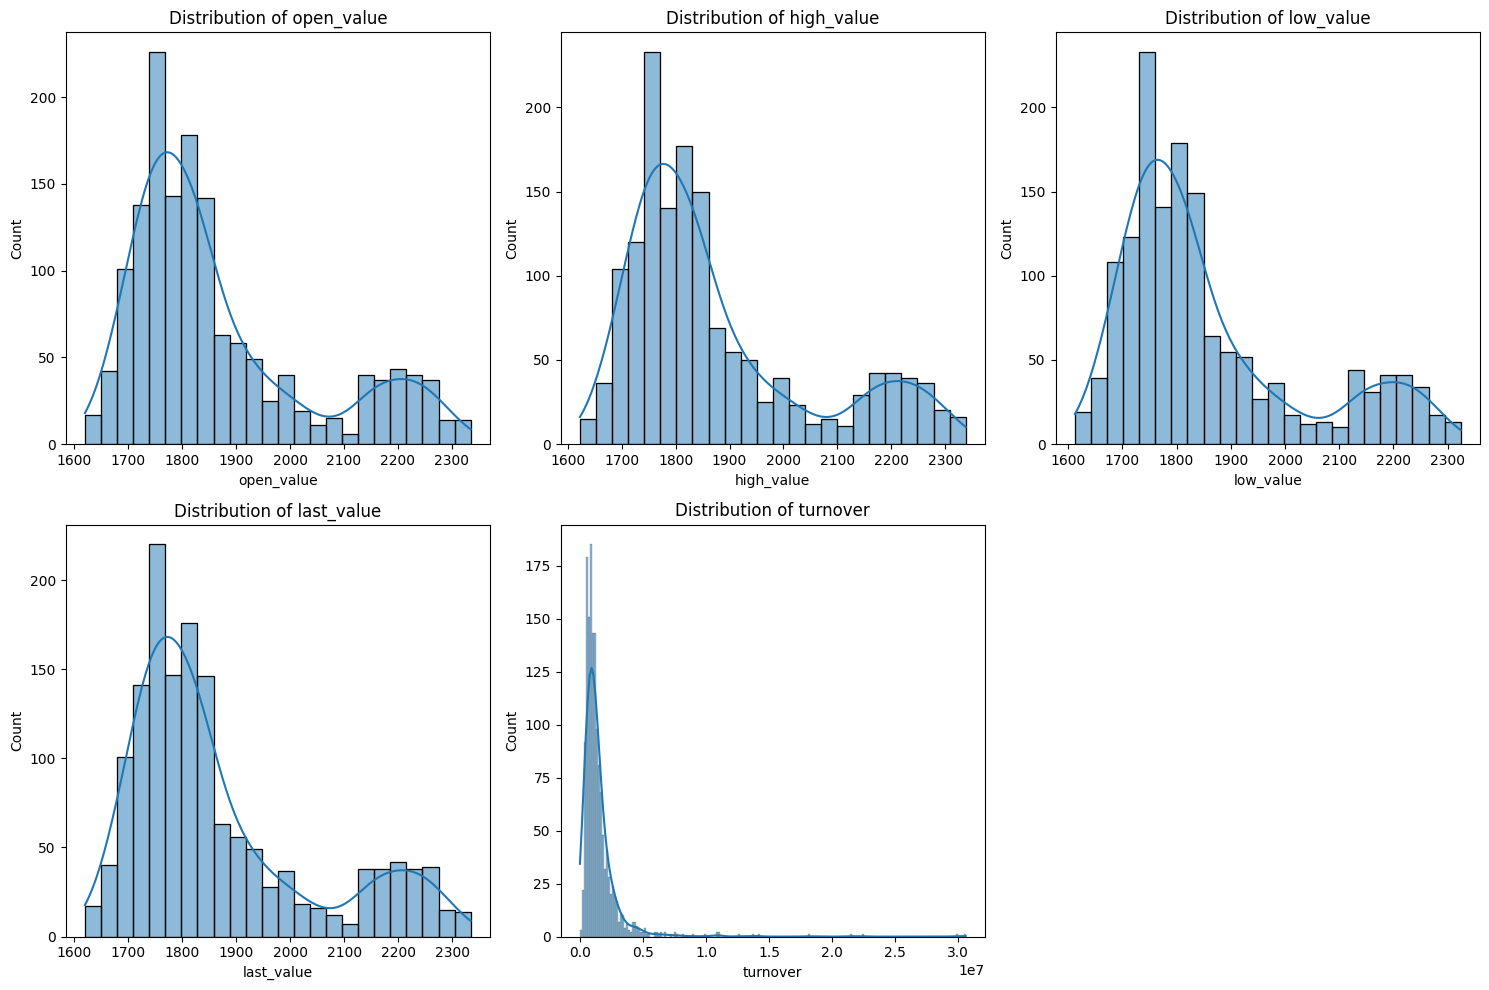

In [15]:
# Distribution Plots
def plot_distribution(data, columns):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

plot_distribution(stock_data, ['open_value', 'high_value', 'low_value', 'last_value', 'turnover'])

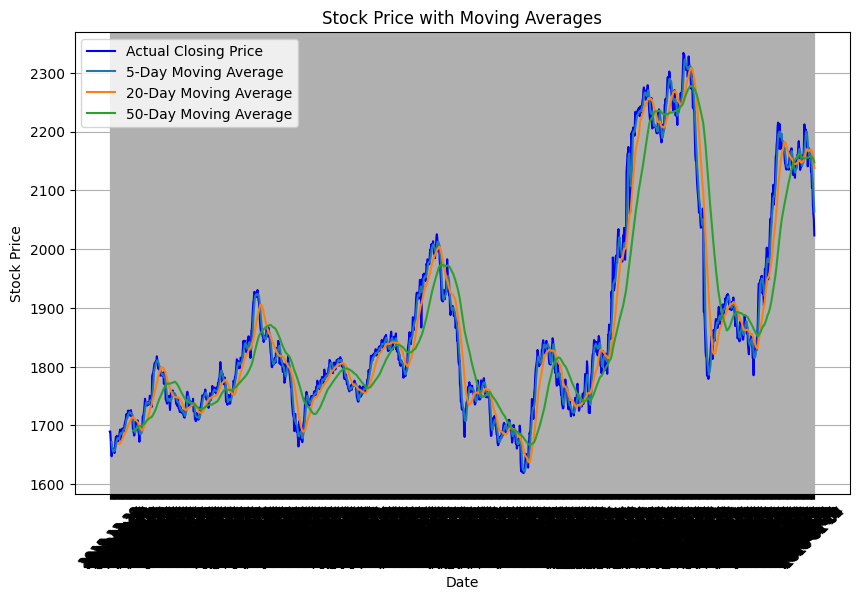

In [16]:
# Moving Averages
def plot_moving_averages(data, window_sizes=[5, 20, 50]):
    plt.figure(figsize=(10, 6))
    plt.plot(data['date'], data['last_value'], label='Actual Closing Price', color='blue')

    for window in window_sizes:
        data[f'MA_{window}'] = data['last_value'].rolling(window=window).mean()
        plt.plot(data['date'], data[f'MA_{window}'], label=f'{window}-Day Moving Average')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

plot_moving_averages(stock_data)